## 📐 What the determinant of a covariance matrix measures
For an $n \times n$ covariance matrix $\Sigma$, the determinant $\det(\Sigma)$ measures the **generalized volume** of the uncertainty ellipsoid associated with a multivariate distribution.

### In other words:
- A **larger determinant** → the data cloud occupies a **larger volume** in $n$-dimensional space.
- A **smaller determinant** → the data cloud is **more compressed**.
- A **zero determinant** → the data lies in a **lower‑dimensional subspace** (perfect multicollinearity).

## 🎯 Why this matters
### 1. **Overall variability**
Each eigenvalue of $\Sigma$ represents variance along a principal axis.  
The determinant is the **product of all eigenvalues**:
$$
\det(\Sigma) = \prod_{i=1}^n \lambda_i.
$$
So it captures the **total spread** across all independent directions.

### 2. **Correlation shrinks volume**
Even if individual variances are large, strong correlations reduce the determinant.

Example in 2D:
$$
\Sigma = 
\begin{pmatrix}
\sigma_x^2 & \rho \sigma_x \sigma_y \\
\rho \sigma_x \sigma_y & \sigma_y^2
\end{pmatrix}
$$
$$
\det(\Sigma) = \sigma_x^2 \sigma_y^2 (1 - \rho^2).
$$

- If $\rho = 0$: full area  
- If $|\rho| \to 1$: area collapses to 0

This is why multicollinearity kills the determinant.

### 3. **Multivariate normal density**
The determinant appears in the normalization constant:
$$
f(x) = \frac{1}{(2\pi)^{n/2} \sqrt{\det(\Sigma)}} 
\exp\!\left( -\frac12 (x-\mu)^\top \Sigma^{-1} (x-\mu) \right).
$$

A larger determinant → broader distribution → lower peak height.

### 4. **Change of variables**
In transformations, $\sqrt{\det(\Sigma)}$ acts like a **scale factor** for uncertainty.

## 🧭 Intuition in one sentence
The determinant of a covariance matrix tells you **how much “space” your random vector occupies**, taking into account both individual variances and how correlated the variables are.

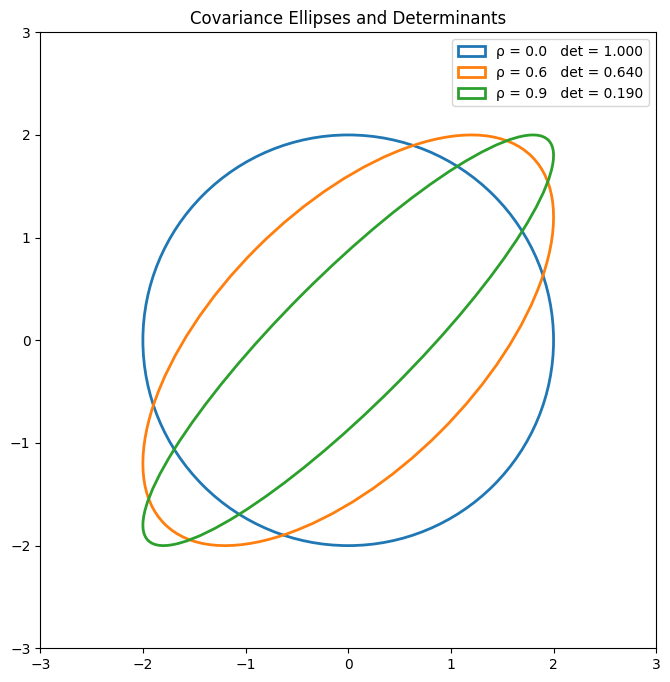

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def covariance_ellipse(cov, n_std=2.0):
    """Return width, height, and angle of the ellipse representing the covariance."""
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]

    width, height = 2 * n_std * np.sqrt(eigenvals)
    angle = np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
    return width, height, angle

# Three covariance matrices with same variances but different correlations
covs = {
    "ρ = 0.0": np.array([[1, 0.0], [0.0, 1]]),
    "ρ = 0.6": np.array([[1, 0.6], [0.6, 1]]),
    "ρ = 0.9": np.array([[1, 0.9], [0.9, 1]])
}

fig, ax = plt.subplots(figsize=(8, 8))

colors = ["tab:blue", "tab:orange", "tab:green"]

for (label, cov), color in zip(covs.items(), colors):
    w, h, angle = covariance_ellipse(cov)
    det = np.linalg.det(cov)

    ellipse = Ellipse(
        xy=(0, 0),
        width=w,
        height=h,
        angle=angle,
        edgecolor=color,
        facecolor="none",
        linewidth=2,
        label=f"{label}   det = {det:.3f}"
    )
    ax.add_patch(ellipse)

# Formatting
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect("equal")
ax.set_title("Covariance Ellipses and Determinants")
ax.legend()
plt.show()



---

# 📊 Python visualization: covariance ellipse + sorted eigenvectors

Let’s build a clear, visual demonstration you can drop straight into your Jupyter notebook. This will show exactly how **sorted eigenvectors** line up with the **principal axes** of a covariance ellipse — the geometric heart of PCA and multivariate Gaussian intuition.

You’ll see:

- the covariance ellipse,
- the eigenvectors as arrows,
- and how sorting them (largest eigenvalue first) aligns them with the ellipse’s major and minor axes.

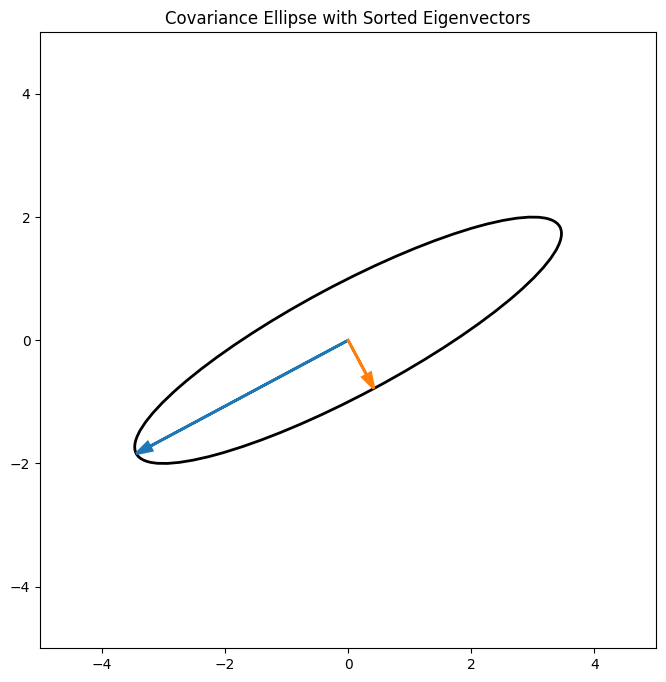

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# --- Helper: compute ellipse parameters from covariance ---
def covariance_ellipse(cov, n_std=2.0):
    eigenvals, eigenvecs = np.linalg.eigh(cov)

    # Sort eigenvalues/eigenvectors descending
    order = eigenvals.argsort()[::-1]
    eigenvals = eigenvals[order]
    eigenvecs = eigenvecs[:, order]

    # Ellipse radii = sqrt(eigenvalues)
    width, height = 2 * n_std * np.sqrt(eigenvals)

    # Angle of the major axis
    angle = np.degrees(np.arctan2(eigenvecs[1,0], eigenvecs[0,0]))

    return width, height, angle, eigenvals, eigenvecs

# --- Example covariance matrix ---
cov = np.array([[3, 1.5],
                [1.5, 1]])

width, height, angle, eigenvals, eigenvecs = covariance_ellipse(cov)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 8))

# Draw ellipse
ellipse = Ellipse(
    xy=(0, 0),
    width=width,
    height=height,
    angle=angle,
    edgecolor="black",
    facecolor="none",
    linewidth=2
)
ax.add_patch(ellipse)

# Draw eigenvectors
origin = np.array([[0, 0]]).T

for i in range(2):
    vec = eigenvecs[:, i] * np.sqrt(eigenvals[i]) * 2
    ax.arrow(0, 0, vec[0], vec[1],
             head_width=0.15, head_length=0.25,
             linewidth=2,
             color="tab:blue" if i == 0 else "tab:orange",
             length_includes_head=True)

# Formatting
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect("equal")
ax.set_title("Covariance Ellipse with Sorted Eigenvectors")
plt.show()


# 🧠 What this visualization shows

### **1. The ellipse**
The ellipse represents the contour of constant Mahalanobis distance for the covariance matrix. Its axes correspond to the directions of maximal and minimal variance.

### **2. The eigenvectors**
- The **first eigenvector** (largest eigenvalue) points along the **major axis** of the ellipse.
- The **second eigenvector** (smaller eigenvalue) points along the **minor axis**.

Sorting ensures:

- eigenvector 0 → major axis  
- eigenvector 1 → minor axis  

Without sorting, NumPy might return them in any order.

### **3. The eigenvalues**
The length of each arrow is proportional to $\sqrt{\lambda_i}$, matching the ellipse radii.

---

If you want to push this further, we can animate how the ellipse changes as correlation varies, or extend the visualization to 3D ellipsoids.

> For the code:
> ```python
> width, height = 2 * n_std * np.sqrt(eigenvals)
> ```
> why are we multiplying by 2

The factor of **2** is there for a very down‑to‑earth geometric reason:  
you’re converting **radii** into **full axis lengths** of the ellipse.

Let’s unpack it cleanly.

---

# 🎯 The geometric meaning

For a covariance matrix $\Sigma$, the eigenvalues $\lambda_1, \lambda_2$ give you the **variances** along the principal axes.

So:

$$
\sqrt{\lambda_i}
$$

is the **standard deviation** along that axis.

When you draw an ellipse representing, say, a 2‑standard‑deviation contour, the **radius** along each axis is:

$$
n\_\text{std} \cdot \sqrt{\lambda_i}
$$

But Matplotlib’s `Ellipse` patch does **not** take radii.  
It expects **full width and height**, meaning:

- width = full length of major axis  
- height = full length of minor axis  

A radius is half the width.  
So you multiply by **2** to convert radius → diameter.

---

# 📐 Putting it together

Radius along axis $i$:

$$
r_i = n\_\text{std} \cdot \sqrt{\lambda_i}
$$

Ellipse wants:

$$
\text{axis length} = 2 r_i = 2 \cdot n\_\text{std} \cdot \sqrt{\lambda_i}
$$

Which is exactly what the code does:

```python
width, height = 2 * n_std * np.sqrt(eigenvals)
```

---

# 🧠 Intuition in one line

The **2** turns “radius of the ellipse along each eigenvector” into the **full axis length** that Matplotlib needs to draw the ellipse.